In [1]:
# Importing packages
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

# PART 1: Data Exploration and Evaluation

In [2]:
# Importing the main dataset
df = pd.read_csv(os.path.join(os.getcwd(),'data','loan.csv'))

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Importing the dictionary and exploring data terms
df_desc = pd.read_excel(os.path.join(os.getcwd(),'data','LCDataDictionary.xlsx')).dropna()
df_desc.style.set_properties(subset=['Description'], **{'width': '900px'})

In [4]:
# Keeping only the rows needed for this study
df = df[['loan_amnt','funded_amnt','term','int_rate','grade','annual_inc','issue_d','dti','revol_bal','total_pymnt','loan_status']]

In [5]:
# Initial exploration of first 15 rows of data
df.head(15)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,2500,2500,36 months,13.56,C,55000.0,Dec-2018,18.24,4341,167.02,Current
1,30000,30000,60 months,18.94,D,90000.0,Dec-2018,26.52,12315,1507.11,Current
2,5000,5000,36 months,17.97,D,59280.0,Dec-2018,10.51,4599,353.89,Current
3,4000,4000,36 months,18.94,D,92000.0,Dec-2018,16.74,5468,286.71,Current
4,30000,30000,60 months,16.14,C,57250.0,Dec-2018,26.35,829,1423.21,Current
5,5550,5550,36 months,15.02,C,152500.0,Dec-2018,37.94,53854,377.95,Current
6,2000,2000,36 months,17.97,D,51000.0,Dec-2018,2.40,0,141.56,Current
7,6000,6000,36 months,13.56,C,65000.0,Dec-2018,30.10,38476,201.53,Current
8,5000,5000,36 months,17.97,D,53580.0,Dec-2018,21.16,8018,353.89,Current
9,6000,6000,36 months,14.47,C,300000.0,Dec-2018,17.43,65950,405.64,Current


In [6]:
# Initial exploration of imported data types (do these datatypes make sense based on review of first 15 rows? No,
# we should change issue_d to a datetime object)
df.dtypes

loan_amnt        int64
funded_amnt      int64
term            object
int_rate       float64
grade           object
annual_inc     float64
issue_d         object
dti            float64
revol_bal        int64
total_pymnt    float64
loan_status     object
dtype: object

In [7]:
# Convert dates to a pandas datetime object
df.issue_d = pd.to_datetime(df.issue_d)

# This will also allow us to calculate the months since the issuance of a loan, should we need it in our future analysis.

## Checking and handling NULL values

In [8]:
# Show first 20 rows of subset of df that contains a NULL value
df[df.isnull().any(axis=1)].head(20)

# Here we see the debt-to-income (dti) column has many NaN values that are most likely due to the number of loans 
# issued to individuals who have represented themselves as having $0 self-reported annual income.

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
428,13000,13000,60 months,10.72,B,0.0,2018-12-01,NaN,32720,273.11,Current
593,18000,18000,60 months,16.91,C,0.0,2018-12-01,NaN,8546,867.60,Current
1605,35000,35000,60 months,16.91,C,0.0,2018-12-01,NaN,27917,1686.98,Current
2647,5500,5500,36 months,13.56,C,0.0,2018-12-01,NaN,1391,363.26,Current
3404,4700,4700,36 months,10.33,B,0.0,2018-12-01,NaN,158,298.04,Current
4436,10800,10800,36 months,7.56,A,0.0,2018-12-01,NaN,35799,336.25,Current
5169,6000,6000,36 months,10.72,B,0.0,2018-12-01,NaN,6939,188.49,Current
5929,5000,5000,36 months,14.47,C,0.0,2018-12-01,NaN,4481,340.06,Current
6026,40000,40000,36 months,23.40,E,0.0,2018-12-01,NaN,38600,3191.50,Current
7237,35000,35000,36 months,18.94,D,0.0,2018-12-01,NaN,25126,1410.80,Current


In [9]:
# Population of null values represents less than 0.01% of the total dataset population
len(df[df.isnull().any(axis=1)]) / len(df)

0.000758625326673355

In [10]:
# Distribution of unique values of the column 'dti'
df[df.isnull().any(axis=1)]['dti'].value_counts(normalize=True, dropna=False)

NaN     0.997668
 1.0    0.001749
 4.0    0.000583
Name: dti, dtype: float64

In [11]:
# Distribution of unique values of the column 'annual_inc'
df[df.isnull().any(axis=1)]['annual_inc'].value_counts(normalize=True, dropna=False)

 0.00     0.967347
 1.00     0.024490
 10.00    0.002915
NaN       0.002332
 0.36     0.000583
 2.00     0.000583
 8.00     0.000583
 6.00     0.000583
 3.00     0.000583
Name: annual_inc, dtype: float64

In [12]:
# Since this subset of null values represents such a small percentage of the population (< 0.01%) and self-reported
# annual income figures seem to be unrealistic or improperly reported, we will choose to drop these null values.
df = df.dropna()

## Exploring each column of data, looking for outliers or data points that may not make sense.

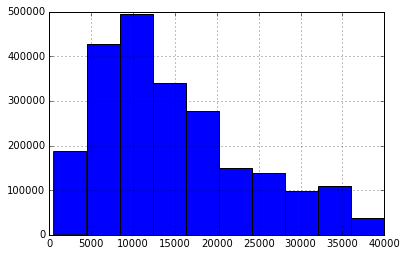

In [13]:
# Studying the distribution of loan amounts
df.loan_amnt.hist()

# There seem to be no outliers or anything extraordinary to note. Distribution is positively skewed with a majority of
# requested loan amounts lying between $5k - $15k.

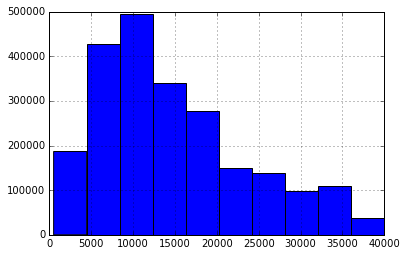

In [14]:
# Studying the distribution of funded amounts
df.funded_amnt.hist()

# There seem to be no outliers or anything extraordinary to note. Distribution is similar to that of requested loan amount.

In [15]:
# No data exists in which the funded amount is greater than the applied for loan amount. This is good.
len(df[df.funded_amnt > df.loan_amnt])

0

In [16]:
# Majority of the loans originated at an amount lower than requested were graded as B loans
df[df.funded_amnt < df.loan_amnt]['grade'].value_counts(normalize=True)

B    0.274092
A    0.240194
C    0.169492
E    0.132203
D    0.106053
F    0.060048
G    0.017918
Name: grade, dtype: float64

In [17]:
# Highlighting loan status of loans that are funded at an amount that is lower than requested
df[df.funded_amnt < df.loan_amnt]['loan_status'].value_counts(normalize=True)

Fully Paid                                             0.764649
Charged Off                                            0.165617
Does not meet the credit policy. Status:Fully Paid     0.046973
Does not meet the credit policy. Status:Charged Off    0.021308
Current                                                0.001453
Name: loan_status, dtype: float64

In [18]:
# Highlighting loan status of all loans
df['loan_status'].value_counts(normalize=True)

# We see that loans that are funded at a lower amount than requested tend to have a higher percentage classified as charged off.

Fully Paid                                             0.461144
Current                                                0.406533
Charged Off                                            0.115803
Late (31-120 days)                                     0.009681
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001651
Does not meet the credit policy. Status:Fully Paid     0.000878
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64

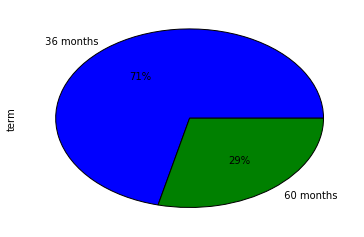

In [19]:
# Studying the distribution of loan terms
df.term.value_counts().plot(kind='pie', autopct='%1.0f%%')

# 71% of loans are 36 month loans, with the other 29% being 60 month loans.

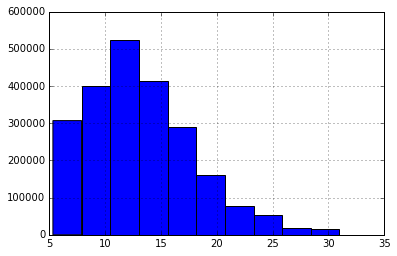

In [20]:
# Studying the distribution of loan interest rates
df.int_rate.hist()

# There seem to be no outliers or anything extraordinary to note. Distribution is positively skewed with most loans 
# exhibiting interest rates that are between 7 - 15%.

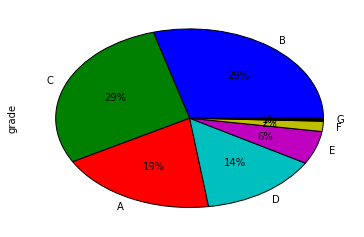

In [21]:
# Studying the distribution of loan grades
df.grade.value_counts().plot(kind='pie', autopct='%1.0f%%')

# Majority of loans are grade B (29%) and grade C (29%).

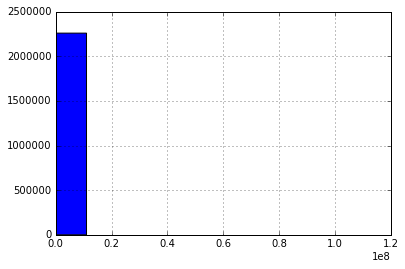

In [22]:
# Studying the distribution of self-reported annual incomes
df.annual_inc.hist()

# Histogram indicates there may be an outlier - let's explore!

In [23]:
# Let us find a subset of data that contains very high reported annual incomes (over $5M per year)
df[df.annual_inc > 5000000].head(30)

# Results are fairly interesting. General intuition questions whether someone who makes over $5M per year would turn 
# to LendingClub to take out a $3,600 loan (loan number 20,593). Some of these figures may seem erroneous or simple
# fat finger errors. A proxy variable to capture this large discrepency between self-reported annual income and funded
# amount is dti.

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
5889,20000,20000,36 months,7.02,A,5119032.0,2018-12-01,0.23,3384,1219.8600,Current
13677,30000,30000,60 months,17.97,D,6863991.0,2018-12-01,0.30,10881,1447.7700,Current
20593,3600,3600,36 months,7.02,A,9000000.0,2018-12-01,0.10,4076,219.5900,Current
43668,10000,10000,36 months,7.56,A,8250000.0,2018-11-01,0.18,14820,906.7200,Current
44854,12000,12000,36 months,14.47,C,5715456.0,2018-11-01,0.30,8282,1167.6900,Current
47270,12000,12000,60 months,8.19,A,7300000.0,2018-11-01,0.24,11940,727.7700,Current
50936,11000,11000,36 months,11.55,B,6599100.0,2018-11-01,0.14,12514,1074.8800,Current
59838,15000,15000,36 months,13.56,C,5214756.0,2018-11-01,0.22,9219,1505.8100,Current
61127,14000,14000,60 months,16.14,C,9757200.0,2018-11-01,0.15,5118,999.3900,Current
63180,1000,1000,36 months,23.40,E,5200000.0,2018-11-01,0.02,520,115.4600,Current


In [24]:
# Filtering on self-reported income above $5M and dti under 0.15 helps us analyze some of these outliers that have a
# high propensity of being fat finger mistakes.
df[(df.annual_inc > 5000000) & (df.dti < 0.15)].head(30)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
20593,3600,3600,36 months,7.02,A,9000000.0,2018-12-01,0.10,4076,219.590000,Current
50936,11000,11000,36 months,11.55,B,6599100.0,2018-11-01,0.14,12514,1074.880000,Current
63180,1000,1000,36 months,23.40,E,5200000.0,2018-11-01,0.02,520,115.460000,Current
80408,10000,10000,36 months,10.08,B,6240000.0,2018-11-01,0.11,7268,957.950000,Current
138039,10000,10000,36 months,11.06,B,7500000.0,2018-09-01,0.03,4497,1635.330000,Current
140651,20000,20000,60 months,26.31,E,8500000.0,2018-09-01,0.08,5569,3083.350000,Current
262487,25000,25000,60 months,11.05,B,6118054.0,2018-06-01,0.10,14811,4322.830000,Current
284499,8400,8400,36 months,19.42,D,9300000.0,2018-06-01,0.02,2654,8405.893400,Fully Paid
385029,20000,20000,60 months,15.04,C,9000000.0,2018-04-01,0.14,7516,4745.490000,Current
426975,10000,10000,60 months,12.62,C,8365188.0,2018-02-01,0.08,633,2700.190000,Current


In [25]:
# Dropping loans that have over $5M in reported annual income and a dti that is lower than 0.15
df = df.drop(df[(df.annual_inc > 5000000) & (df.dti < 0.15)].index, axis=0)

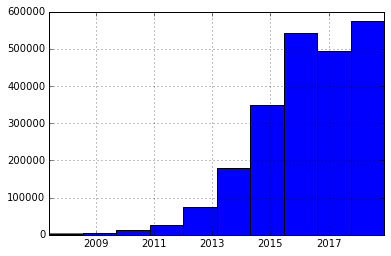

In [26]:
# Studying the distribution of issue dates
df.issue_d.hist()

# The issue dates do not seem to highlight any outliers. A fair ramp up is seen from 2012 and onwards, most likely due
# to the increase in popularity of the platform.

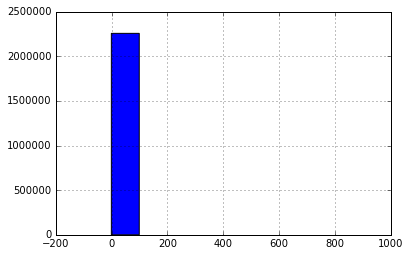

In [27]:
# Studying the distribution of dti
df.dti.hist()

# Initial results show values less than 0, which does not make sense. Values greater than 100 (assumption that 100 is
# where debt payments = income) also exist, but such occurences are possible, albeit very risky to the loan originator.

In [28]:
# Drop subset of dti values less than 0
df = df.drop(df[df.dti < 0].index, axis=0)

In [29]:
# Study distribution of revolving balances
df.revol_bal.value_counts().sort_index(ascending=False)

# Revolving balances over $1M may be worth looking into

2904836        1
2568995        1
2560703        1
2559552        1
2358150        1
1830688        1
1803041        1
1746716        1
1743266        1
1698749        1
1696796        1
1630818        1
1470945        1
1392002        1
1298783        1
1241185        1
1207359        1
1190046        1
1137891        1
1113293        1
1101954        1
1087664        1
1049095        1
1044210        1
1043860        1
1039903        1
1039013        1
1030826        1
1023940        1
1006564        1
           ...  
29           118
28            81
27            96
26            88
25           112
24            87
23            91
22            83
21            87
20            91
19           108
18            90
17            75
16            95
15            91
14           126
13           104
12           128
11           111
10           170
9            140
8            216
7            128
6            149
5            159
4            153
3            151
2            1

In [30]:
# Although these are high revolving balances, high levels of self-reported annual income make it seem plausible. Ergo,
# we should keep all this data in our analysis.
df[df['revol_bal'] > 1000000]

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
8766,40000,40000,60 months,10.33,B,1123100.0,2018-12-01,8.76,1049095,1678.370000,Current
34250,40000,40000,36 months,11.80,B,3000000.0,2018-12-01,11.05,2358150,2623.300000,Current
64250,40000,40000,60 months,12.98,B,600000.0,2018-11-01,14.66,1803041,2700.320000,Current
141901,40000,40000,36 months,7.84,A,250000.0,2018-09-01,30.70,1101954,6217.710000,Current
255567,40000,40000,60 months,16.46,C,300000.0,2018-07-01,26.70,1137891,6822.840000,Current
263812,35000,35000,36 months,8.08,A,215000.0,2018-06-01,30.45,1392002,8906.410000,Current
316163,35000,35000,36 months,10.07,B,499992.0,2018-05-01,33.57,1830688,10135.430000,Current
344808,30000,30000,36 months,10.41,B,350000.0,2018-04-01,30.32,1113293,9720.750000,Current
347931,40000,40000,36 months,5.31,A,1000000.0,2018-04-01,7.38,1241185,14666.640000,Current
384784,30000,30000,60 months,24.84,E,230000.0,2018-04-01,36.14,1470945,8735.900000,Current


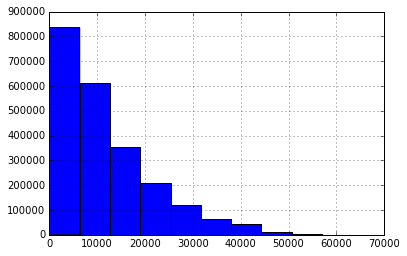

In [31]:
# Studing the distribution of total payments
df.total_pymnt.hist()

# No extraordinary outliers are found

In [32]:
# Studying the distribution of Loan Status
df.loan_status.value_counts(normalize=True)

# Default rate is substantially low. Considering the high levels of dti found earlier, I question whether this number
# will drastically increase in the upcoming few years as loans mature further.

Fully Paid                                             0.461144
Current                                                0.406532
Charged Off                                            0.115803
Late (31-120 days)                                     0.009681
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001651
Does not meet the credit policy. Status:Fully Paid     0.000878
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64

In [33]:
# Summary statistics of loan grades
df.groupby(['grade']).describe()

# This initial study of loan grade summary statistics gives us an idea as to how LendingClub generally grades it's loans
# at time of origination. Grade can be considered as a proxy to account for LendingClub's perception of the likelihood
# that one of their loans may go into default.

annual_inc            dti    funded_amnt       int_rate  \
grade                                                                    
A     count  4.327260e+05  432726.000000  432726.000000  432726.000000   
      mean   8.981205e+04      16.239080   14594.410031       7.084607   
      std    8.307498e+04      12.098882    9105.668231       0.984510   
      min    2.000000e+01       0.000000     500.000000       5.310000   
      25%    5.300000e+04      10.030000    8000.000000       6.460000   
      50%    7.500000e+04      15.240000   12000.000000       7.240000   
      75%    1.060000e+05      21.240000   20000.000000       7.890000   
      max    9.573072e+06     999.000000   40000.000000       9.630000   
B     count  6.631120e+05  663112.000000  663112.000000  663112.000000   
      mean   7.856025e+04      17.966847   14165.511407      10.675763   
      std    7.214877e+04      13.433874    8952.569104       1.238406   
      min    0.000000e+00       0.000000     500.000000       6.000000   
      25%    4.750000e+04      11.410000    7375.000000       9.880000   
      50%    6.500000e+04      17.030000   12000.000000      10.750000   
      75%    9.400000e+04      23.340000   20000.000000      11.490000   
      max    9.300086e+06     999.000000   40000.000000      14.090000   
C     count  6.495330e+05  649533.000000  649533.000000  649533.000000   
      mean   7.431091e+04      19.552385   15031.718288      14.143520   
      std    6.597529e+04      14.718870    9200.463221       1.250957   
      min    0.000000e+00       0.000000     500.000000       6.000000   
      25%    4.500000e+04      12.630000    8000.000000      13.220000   
      50%    6.300000e+04      18.660000   13000.000000      13.990000   
      75%    9.000000e+04      25.270000   20000.000000      15.020000   
      max    9.930475e+06     999.000000   40000.000000      17.270000   
D     count  3.240900e+05  324090.000000  324090.000000  324090.000000   
      mean   7.099477e+04      20.929949   15705.307322      18.142027   
      std    6.122804e+04      15.526398    9247.823181       1.675860   
      min    0.000000e+00       0.000000     500.000000       6.000000   
      25%    4.230000e+04      13.620000    8575.000000      16.990000   
      50%    6.000000e+04      20.110000   14400.000000      17.970000   
      75%    8.500000e+04      27.110000   21200.000000      19.030000   
      max    8.000000e+06     999.000000   40000.000000      22.350000   
E     count  1.355360e+05  135536.000000  135536.000000  135536.000000   
      mean   7.180904e+04      21.549752   17437.915941      21.827458   
      std    5.744329e+04      15.555132    9355.471732       2.702615   
      min    2.300000e+01       0.000000     600.000000       6.000000   
      25%    4.400000e+04      14.260000   10000.000000      19.520000   
      50%    6.000000e+04      20.900000   16000.000000      21.480000   
      75%    8.500000e+04      27.870000   24075.000000      23.990000   
      max    7.500000e+06     999.000000   40000.000000      27.270000   
F     count  4.177200e+04   41772.000000   41772.000000   41772.000000   
      mean   7.270649e+04      21.676804   19101.515968      25.452290   
      std    4.901743e+04      13.934487    9159.662532       2.925762   
      min    5.000000e+01       0.000000    1000.000000       6.000000   
      25%    4.500000e+04      14.590000   12000.000000      23.430000   
      50%    6.300000e+04      21.170000   18125.000000      24.890000   
      75%    8.700000e+04      28.010000   25600.000000      28.690000   
      max    2.500000e+06     999.000000   40000.000000      30.750000   
G     count  1.215100e+04   12151.000000   12151.000000   12151.000000   
      mean   7.534695e+04      22.432815   20361.392066      28.070567   
      std    5.098552e+04      20.251670    8992.439388       2.804765   
      min    3.000000e+02       0.000000     600.000000       6.000000   
      25%    4.6188

In [34]:
# Summary statistics of loan status'
df.groupby(['loan_status']).describe()

# This analysis shows us a more ad-hoc representation of what the loans looked like after origination. Such a study
# allows us to juxtapose LendingClub's perception of default risk with actual results.

# Average interest rates of loans in default lies between grades C and D. The standard deviation for funded amount is
# highest for loans that are in default.

annual_inc  \
loan_status                                                              
Charged Off                                        count  2.615900e+05   
                                                   mean   7.024163e+04   
                                                   std    5.776689e+04   
                                                   min    2.000000e+01   
                                                   25%    4.300000e+04   
                                                   50%    6.000000e+04   
                                                   75%    8.500000e+04   
                                                   max    7.500000e+06   
Current                                            count  9.183230e+05   
                                                   mean   8.044439e+04   
                                                   std    7.784010e+04   
                                                   min    0.000000e+00   
                                                   25%    4.700000e+04   
                                                   50%    6.700000e+04   
                                                   75%    9.600000e+04   
                                                   max    9.930475e+06   
Default                                            count  3.100000e+01   
                                                   mean   6.607419e+04   
                                                   std    3.298752e+04   
                                                   min    2.100000e+04   
                                                   25%    3.950000e+04   
                                                   50%    6.200000e+04   
                                                   75%    8.350000e+04   
                                                   max    1.550000e+05   
Does not meet the credit policy. Status:Charged... count  7.610000e+02   
                                                   mean   6.952592e+04   
                                                   std    6.212747e+04   
                                                   min    2.000000e+03   
                                                   25%    3.600000e+04   
                                                   50%    5.400000e+04   
...                                                                ...   
Fully Paid                                         std    6.520336e+04   
                                                   min    1.600000e+01   
                                                   25%    4.700000e+04   
                                                   50%    6.500000e+04   
                                                   75%    9.300000e+04   
                                                   max    9.522972e+06   
In Grace Period                                    count  8.946000e+03   
                                                   mean   8.116424e+04   
                                                   std    6.972869e+04   
                                                   min    1.100000e+03   
                                                   25%    4.848800e+04   
                                                   50%    6.856050e+04   
                                                   75%    9.695500e+04   
                                                   max    4.000000e+06   
Late (16-30 days)                                  count  3.729000e+03   
                                                   mean   7.956381e+04   
                                                   std    6.500816e+04   
                                                   min    3.000000e+03   
                                                   25%    4.628000e+04   
                                                   50%    6.500000e+04   
                                                   75%    9.552400e+04   
                                                   max    1.7500

# Part 2: Business Analysis

First remove loans that have less than 36 months of available data

In [35]:
# Create a data column that counts the number of months since loan issuance
df['inv_mnths'] = ((df.issue_d - pd.to_datetime('today'))/np.timedelta64(1, 'M')).astype('int') * -1

# Drop all loans with less than 36 months of available data
df = df[df.inv_mnths >= 36]

print("Only "+str(len(df[df.inv_mnths >= 36]))+" loans remain with 36 or more months of available data.")

Only 1021291 loans remain with 36 or more months of available data.


The clause "Assume a 36 month investment period for each loan" led to an internal conversation as to whether I should force convert (based on term "assume") pre-existing 60 month loans to 36 month loans, but decided to drop the 60 month loans on the premise that 60 month loans would be offered with different characteristics (e.g., different interest rates based on loan length, different LendingClub grades, potentially different loan amounts).

In [36]:
# Dropping 60 month term loans
# Use RegEx to pull out just the number of months
df['term'] = df.term.str.extract('(\d+)', expand=False).astype(int) 

# Drop rows containing 60 month loans
df = df[df['term'] == 36] 

### 1) What percentage of loans has been fully paid

In [37]:
df.loan_status.value_counts(normalize=True)

Fully Paid                                             0.832870
Charged Off                                            0.139590
Current                                                0.022441
Does not meet the credit policy. Status:Fully Paid     0.002489
Late (31-120 days)                                     0.001189
Does not meet the credit policy. Status:Charged Off    0.000905
In Grace Period                                        0.000372
Late (16-30 days)                                      0.000139
Default                                                0.000004
Name: loan_status, dtype: float64

In [38]:
print(""+"{0:.0%}".format(df.loan_status.value_counts(normalize=True)[0])+" of 36 month loans have been fully paid")

83% of 36 month loans have been fully paid


### 2) When bucketed by year of origination and grade, which cohort has the highest rate of defaults? Here you may assume that any loan which has not fully paid had "defaulted."

In [39]:
# Add a new column that represents a bifurcations of whether a loan was 
# Fully Paid or Defaulted (catch all for all other conditions)
df['stat_bin'] = df.loc[:,'loan_status'].apply(lambda x: 0 if x == "Fully Paid" else 1)

In [40]:
# Add a new column that just captures year of origination
df['orig_yr'] = df.loc[:,'issue_d'].apply(lambda x: x.year)

In [41]:
# Perform a groupby based on year of loan origination and grade of loan and calculate the percentage of defaults for
# each cohort.
df.groupby(['orig_yr','grade']).agg({'stat_bin':lambda x: (x.sum() / x.count())})

stat_bin
orig_yr grade          
2007    A      0.243243
        B      0.459184
        C      0.567376
        D      0.777778
        E      0.910000
        F      0.903846
        G      1.000000
2008    A      0.125786
        B      0.271044
        C      0.379310
        D      0.599045
        E      0.778947
        F      0.900901
        G      0.976744
2009    A      0.086451
        B      0.163322
        C      0.245549
        D      0.334149
        E      0.399351
        F      0.495238
        G      0.727273
2010    A      0.053370
        B      0.134403
        C      0.224263
        D      0.294493
        E      0.348214
        F      0.505495
        G      0.647059
2011    A      0.063990
        B      0.105676
...                 ...
2012    F      0.184466
        G      0.166667
2013    A      0.045612
        B      0.097859
        C      0.152958
        D      0.203930
        E      0.233055
        F      0.268092
        G      0.266667
2014    A      0.053832
        B      0.107239
        C      0.171950
        D      0.221745
        E      0.270309
        F      0.294949
        G      0.363128
2015    A      0.054585
        B      0.119793
        C      0.195148
        D      0.263241
        E      0.329524
        F      0.424798
        G      0.467742
2016    A      0.255971
        B      0.293400
        C      0.362549
        D      0.429140
        E      0.505344
        F      0.525460
        G      0.581028

[70 rows x 1 columns]

Grade G loans originated in 2007 had the highest rate of defaults, at 100%.

### 3) When bucketed by year of origination and grade, what annualized rate of return have these loans generated on average? For simplicity, use the following approximation:
    Annualized Rate of Return = (total_pymnt / funded amnt) ^ (1/3) - 1

In [42]:
# Build column that calculates annual rate of return for each loan
df['ann_ror'] = (df.total_pymnt / df.funded_amnt)**(1/3) - 1

In [43]:
# Perform a groupby based on year of loan origination and grade of loan and calculate the average annual rate of return
# for each cohort.
df.groupby(['orig_yr','grade']).agg({'ann_ror':'mean'})

ann_ror
orig_yr grade          
2007    A      0.026455
        B     -0.001857
        C     -0.008002
        D     -0.013119
        E     -0.015043
        F     -0.079793
        G     -0.044028
2008    A      0.023488
        B     -0.000276
        C     -0.003972
        D     -0.018201
        E     -0.003274
        F     -0.044362
        G     -0.007825
2009    A      0.021457
        B      0.014551
        C      0.012092
        D      0.014316
        E     -0.000189
        F      0.002747
        G      0.003100
2010    A      0.021672
        B      0.022018
        C      0.022432
        D      0.012707
        E      0.014385
        F     -0.007690
        G     -0.007570
2011    A      0.014997
        B      0.022047
...                 ...
2012    F      0.033400
        G      0.043012
2013    A      0.024873
        B      0.030172
        C      0.030388
        D      0.028380
        E      0.028680
        F      0.020588
        G     -0.007625
2014    A      0.021949
        B      0.025857
        C      0.021428
        D      0.017577
        E      0.013843
        F      0.018980
        G      0.005299
2015    A      0.019434
        B      0.018160
        C      0.011118
        D      0.002422
        E     -0.010299
        F     -0.026656
        G     -0.044741
2016    A      0.015273
        B      0.013158
        C      0.004216
        D     -0.006470
        E     -0.022519
        F     -0.027123
        G     -0.049215

[70 rows x 1 columns]

# Part 3: Modeling

Build a logistic regression to predict loan defaults (as defined in question 2 above) that could help the avoidance of investing in such loans.

Assume that:
1) You are given the ability to invest in each loan independently;
2) You invest immediately following loan origination and hold to maturity (36 months); and
3) All loan fields that would be known upon origination are made available

In [44]:
# Import dataset to include all loan fields upon origination and perform pre-processing as done in Part 1 and compile
# final dataset that will be used for the model
df1 = pd.read_csv(os.path.join(os.getcwd(),'data','loan.csv')) 

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleanup and Preprocessing

In [45]:
# Remove all columns that contain only null values
df1 = df1.loc[:,~df1.isnull().all()]

# Model based on only 36 month loans
df1['term'] = df1.term.str.extract('(\d+)', expand=False).astype('int64') # Use RegEx to pull out just the number of months
df1 = df1[df1['term'] == 36] # Drop rows containing 60 month loans

# Build column counting the number of months since loan origination
df1.issue_d = pd.to_datetime(df1.issue_d)  # convert to pandas datetime objects
df1.last_pymnt_d = pd.to_datetime(df1.last_pymnt_d)  # convert to pandas datetime objects

# Remove rows for which last payment date does not exist
df1 = df1[pd.notnull(df1['last_pymnt_d'])]

# Create a data column that counts the number of months since loan issuance
df1['inv_mnths'] = ((df1.issue_d - pd.to_datetime('today'))/np.timedelta64(1, 'M')).astype('int') * -1
df1 = df1[df1.inv_mnths >= 36] # Drop all loans with less than 36 months of available data

# Build column counting the number of days between funding loan and last payment (ideally should be 36 
# or less for a 36 mo loan)
df1['issue_delta_lst_pmt'] = ((df1.last_pymnt_d - df1.issue_d)/np.timedelta64(1, 'M')).astype('int')

# Similar to in part 2, stat_bin column is added to account for loans that have been fully paid, with all else being
# considered as defaults. In this instance, we will use additional information from last_pymnt_d to consider loans
# with last_pymnt_d greater than 36 months from issuance as defaulted, represented by a 0 (zero).
df1['stat_bin'] = 1 # Initialize columns with defaults
mask = (df1['loan_status']=="Fully Paid") & (df1['issue_delta_lst_pmt'] < 37)  # Build mask
df1.loc[mask,'stat_bin'] = 0  # Populate fully paid columns from mask with 0
df1 = df1.drop(['loan_status','inv_mnths','term'], axis=1) # Drop loan status column as stat_bin will be used as dependent variable instead

# Drop all rows containing any form of NULL value from dataset
df1 = df1.dropna(how='any',axis=1)

# Convert all floats to integers
for col in df1.columns:
    if df1[col].dtype == "float64":
        df1[col] = df1[col].astype("int64")

# Preprocess data before ingestion into LogisticRegression model
# LabelEncode first
le = preprocessing.LabelEncoder()  # Initialize LabelEncoder for columns that are of type object
for col in df1.columns:
    if df1[col].dtype != "int64":
        df1[col] = le.fit_transform(df1[col])

# Then OneHotEncode
df1 = pd.get_dummies(df1)

## Build Model

In [46]:
# Declare dependent and independent variables
# Panda series of dependent variable (1 means default, 0 means fully paid)
y = df1.stat_bin 

# Set of independent variables
X = df1.drop(['stat_bin'],axis=1) 

# Ensure value of each attribute has a mean value of 0 and sd of 1. It is imperative that we 
# standardize the independent variables before feeding into PCA.
X = preprocessing.StandardScaler().fit_transform(X) 

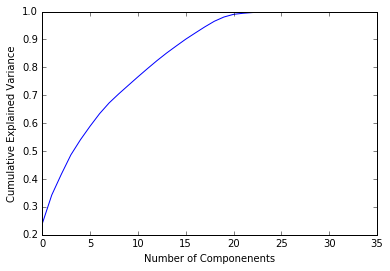

In [47]:
# Unsupervised dimensionality reduction using PCA
# Initialize and fit PCA (omit the delcaration of n_components for now) on independent variables
pca = PCA().fit(X) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Componenents")
plt.ylabel("Cumulative Explained Variance")
# Plot shows that ~90% of the variance is captured by 15 components

# Initiatlize 15 component PCA and fit on independent variables
X_pca = PCA(n_components=15).fit_transform(X) 

In [48]:
# REPORT INITIAL RESULTS WITHOUT PCA
# Split datasets into training (70%) and testing (30%). Choose to stratify and ensure that defaults are appropriately
# represented within each bifurcation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Build Cross-validated Logistic Regression model and fit to data
# Initialize Cross-validated LogisticRegression model
lr = LogisticRegressionCV(cv=5, n_jobs=-1, verbose=1, scoring='roc_auc', random_state=0)
# Fit model to training set
lr.fit(X_train, y_train) 
lr_pred = lr.predict(X_test)
                     
# Print initial results
print("\n CONFUSION MATRIX")
print(confusion_matrix(y_test, lr_pred)) # Print confusion matrix
print("\n CLASSIFICATION REPORT")
print(classification_report(y_test, lr_pred)) # Print classification report
print("\n The accuracy of Logistic Regression model on the testing set is "+str("{0:.0%}".format(lr.score(X_test, y_test))))

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:701: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:701: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:701: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:701: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished



 CONFUSION MATRIX
[[169574    273]
 [  8370  36790]]

 CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.95      1.00      0.98    169847
          1       0.99      0.81      0.89     45160

avg / total       0.96      0.96      0.96    215007


 The accuracy of Logistic Regression model on the testing set is 96%


In [49]:
# REPORT INITIAL RESULTS WITH PCA
# Split datasets into training (70%) and testing (30%). Choose to stratify and ensure that defaults are appropriately
# represented within each bifurcation
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0, stratify=y)

# Build Cross-validated Logistic Regression model and fit to data
# Initialize Cross-validated LogisticRegression model (we can explore Ridge regression since PCA eliminated many of our
# variables and there is no need to zero them out w/ Lasso)
lr = LogisticRegressionCV(cv=5, verbose=1, n_jobs=-1, scoring='roc_auc', penalty='l2', random_state=0)
# Fit model to training set
lr.fit(X_train, y_train) 
lr_pred = lr.predict(X_test)

# Print initial results
print("\n CONFUSION MATRIX")
print(confusion_matrix(y_test, lr_pred)) # Print confusion matrix
print("\n CLASSIFICATION REPORT")
print(classification_report(y_test, lr_pred)) # Print classification report
print("\n The accuracy of Logistic Regression model on the testing set is "+str("{0:.0%}".format(lr.score(X_test, y_test))))

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.9s finished



 CONFUSION MATRIX
[[169539    308]
 [ 11503  33657]]

 CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.94      1.00      0.97    169847
          1       0.99      0.75      0.85     45160

avg / total       0.95      0.95      0.94    215007


 The accuracy of Logistic Regression model on the testing set is 95%


In [50]:
# Predict from fitted model, optimizing threshold for Fully Paid precision
lr_pred_array = lr.predict_proba(X_test) # 2-D array of probabilities of 0 and 1
def_prob = [x[1] for x in lr_pred_array] # Pull out just the prediction probability for 1, default
lr_pred_opt = [1 if x > 0.1 else 0 for x in def_prob] # Use numpy to manually set threshold at 0.4

# Print Fully Paid precision optimized results
print("\n FULLY PAID PRECISION OPTIMIZED CONFUSION MATRIX")
print(confusion_matrix(y_test, lr_pred_opt)) # Print confusion matrix
print("\n FULLY PAID PRECISION OPTIMIZED CLASSIFICATION REPORT")
print(classification_report(y_test, lr_pred_opt)) # Print classification report
print("\n The accuracy of FULLY PAID PRECISION OPTIMIZED Logistic Regression model on the testing set is "+str("{0:.0%}".format(np.mean(lr_pred_opt == y_test))))


 FULLY PAID PRECISION OPTIMIZED CONFUSION MATRIX
[[124497  45350]
 [  2644  42516]]

 FULLY PAID PRECISION OPTIMIZED CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.98      0.73      0.84    169847
          1       0.48      0.94      0.64     45160

avg / total       0.88      0.78      0.80    215007


 The accuracy of FULLY PAID PRECISION OPTIMIZED Logistic Regression model on the testing set is 78%


## Was the model effective? Explain how you validated your model and describe how you measure the performance of the model.

Before making conclusatory remarks on the models effectiveness, I think it is important to discuss how the model was validated and measured for performance, the results of which will translate to the overall effectiveness of the model.

I built two models - one which incldues all original features and one which has gone through dimensionality reduction by way of Principal Component Analysis. Regarding the PCA, the number of components chosen was based on the cumulative distribution function of explained variance. Graphing such showed us that 15 components accounted for approximately 90% of all explained variance. I would lean towards using PCA as the lower number of features placed into the Logistic Regression model will increase both computational efficiency and (may) reduce instances of overfitting. Choosing the model compiled using PCA as our main model, we will now move forward to the discussion regarding validation, ultimate performance, and holistic model effectiveness.

The pre-processed dataset was split into a training (70%) and test (30%) set. This allowed us to train the model on a set of results and then test it on new data. This training and test set bifurcation is performed with stratification, ensuring uniformity between the placement of defaulted loans within each data set (e.g., 70% of defaulted loans are in training set). The Logistic Regression model was built using 5-fold cross-validation, scored on ROC curve scores. Once model is tuned, we fit it to the training set and use this trained model to predict the probability of default for loans in the testing set.

Baseline numbers - 

When comparing predicted results against the actual results, we see that overall model accuracy is approximately 95%. When looking at model effectiveness, especially when considering the purpose of the model (investing in loans that will not default), it is important to consider the precision and recall. Results indicate that 94% of loans identified as Fully Paid were truly Fully Paid. A recall of 1.00 for Fully Paid loans indicate a substantially low number of false negatives. The high level of precision (0.99) for loans classified as default does well in highlighting loans that should be avoided as part of the investment process.

Analysis and adjustments -

While these numbers are decent, this model only does well in identifying loans that will default with high precision. This does not necessarily mean it will help us invest in loans that will become Fully Paid in the future. To find the best investment in loans that will become Fully Paid, we would like to maximize the precision of 0, not 1. Ideally, a precision of 0.98 or higher for predicted Fully Paid loans should be achieved. To achieve such accuracy, one can go back and adjust the threshold for identifying whether a loan is predicted to default. By reducing the default threshold (0.5) to 0.1, more loans will be identified to default, reducing our universe of loans that exepct to be Fully Paid but also in theory increasing the precision of these loans. As a result, our precision of predicted Fully Paid loans is improved to 0.98, at the sacrifice of overall model accuracy (which is reduced to 78% from 95%). Granted, this higher level of precision for predicting Fully Paid loans makes this model more effective in finding investments that will pay off in the end.
